In [5]:
import numpy as np
import pandas as pd


from scipy.stats import norm
from scipy.io import loadmat

from scipy.optimize import leastsq
from scipy.optimize import least_squares
from scipy.io import loadmat
from scipy.interpolate import interp1d
from scipy.stats import norm
import multiprocessing as mp
from scipy.fft import fft, ifft, fftshift,ifftshift
from scipy.signal import fftconvolve

import matplotlib

from scipy.signal import sosfilt, butter

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [7]:
time_min=-3
time_max=3
nx = 500000

time =np.arange(time_min,time_max,(time_max-time_min)/(nx-1))

currents = np.linspace(10,500,10) # Stimulus amplitudes

tIndex = np.intersect1d(np.where(time*1e3>0),np.where(time*1e3<10))

iteration = 0 # Irrelelevant since there is only one iteration

In [14]:
def getDiameters():
    
   
    minDiam = .1
    maxDiam = 15
    
    d = np.linspace(minDiam,maxDiam,2000)*1e-6

    return d

d = getDiameters() 

In [8]:
outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/Analytic_allActive_squareTerm_senn_newRec/'

distanceIdx = 0 # 6 cm

maffAll = np.load(outputfolder+'/'+str(iteration)+'/maff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    maffAll = np.vstack((maffAll,np.load(outputfolder+'/'+str(iteration)+'/maff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))
    
meffAll = np.load(outputfolder+'/'+str(iteration)+'/meff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    meffAll = np.vstack((meffAll,np.load(outputfolder+'/'+str(iteration)+'/meff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))

uaffAll = np.load(outputfolder+'/'+str(iteration)+'/uaff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    uaffAll = np.vstack((uaffAll,np.load(outputfolder+'/'+str(iteration)+'/uaff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))

ueffAll = np.load(outputfolder+'/'+str(iteration)+'/ueff/'+str(0)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    ueffAll = np.vstack((ueffAll,np.load(outputfolder+'/'+str(iteration)+'/ueff/'+str(0)+'/signals_'+str(i)+'.npy')[np.newaxis]))

totalAll = maffAll + meffAll+ uaffAll + ueffAll


In [9]:
signals = np.sum(totalAll,axis=0)

In [10]:
recruitment = []
for i in range(39):
    recruitment.append(np.load(outputfolder+'/'+str(iteration)+'/recruitment/recruitment_'+str(i)+'.npy',allow_pickle=True))
    

In [11]:
outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic'

distanceIdx = 0 # 6 cm

maffAllR = np.load(outputfolder+'/'+str(iteration)+'/maff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    maffAllR = np.vstack((maffAllR,np.load(outputfolder+'/'+str(iteration)+'/maff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))
    
meffAllR = np.load(outputfolder+'/'+str(iteration)+'/meff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    meffAllR = np.vstack((meffAllR,np.load(outputfolder+'/'+str(iteration)+'/meff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))

uaffAllR = np.load(outputfolder+'/'+str(iteration)+'/uaff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    uaffAllR = np.vstack((uaffAllR,np.load(outputfolder+'/'+str(iteration)+'/uaff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))

ueffAllR = np.load(outputfolder+'/'+str(iteration)+'/ueff/'+str(0)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    ueffAllR = np.vstack((ueffAllR,np.load(outputfolder+'/'+str(iteration)+'/ueff/'+str(0)+'/signals_'+str(i)+'.npy')[np.newaxis]))

totalAllR = maffAllR + meffAllR+ uaffAllR + ueffAllR


In [13]:
signalsR = np.sum(totalAllR,axis=0)

In [12]:
recruitmentR = []
for i in range(39):
    recruitmentR.append(np.load(outputfolder+'/'+str(iteration)+'/recruitment/recruitment_'+str(i)+'.npy',allow_pickle=True))
    

<IPython.core.display.Javascript object>


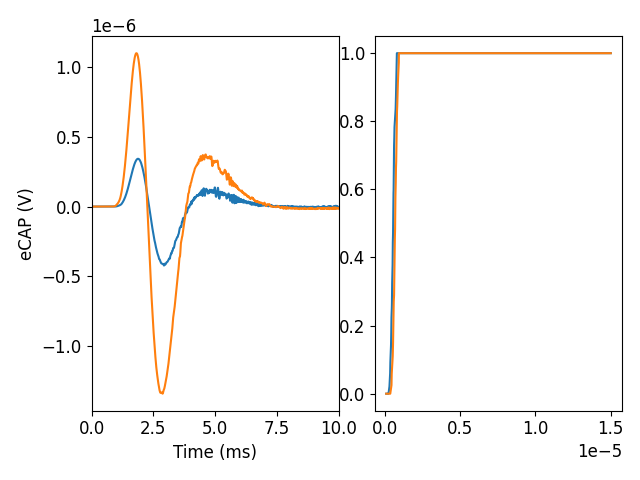

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<IPython.core.display.Javascript object>


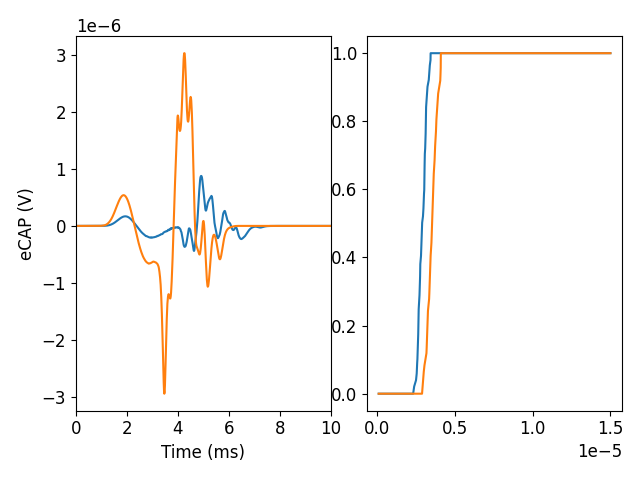

<IPython.core.display.Javascript object>


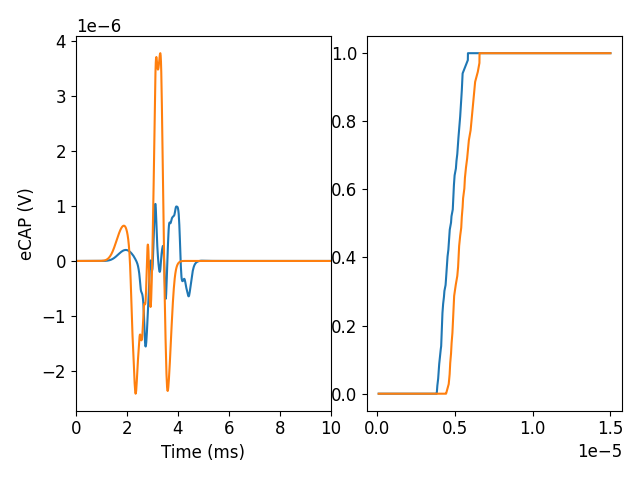

<IPython.core.display.Javascript object>


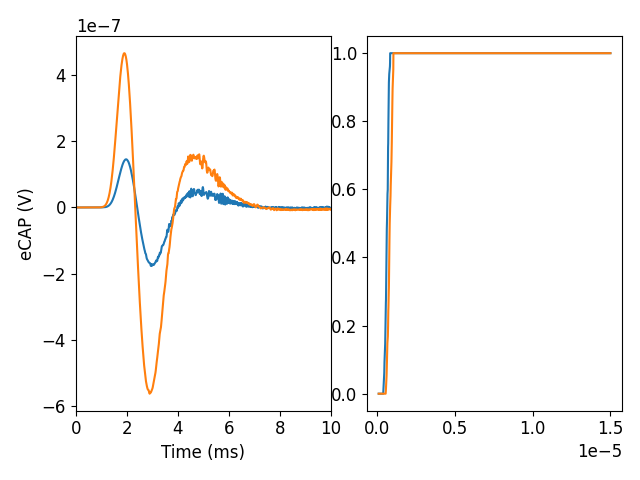

<IPython.core.display.Javascript object>


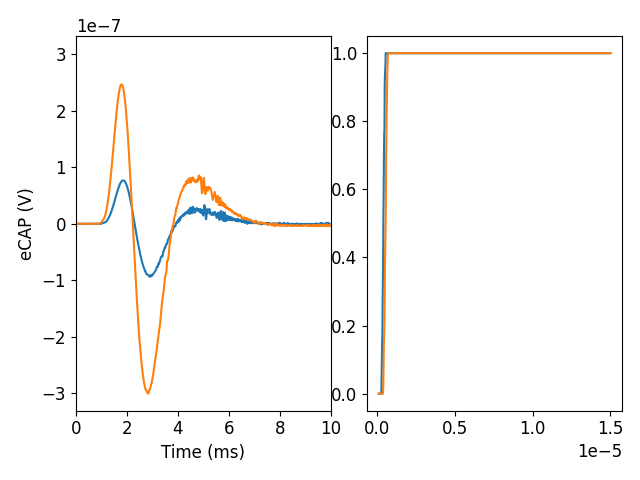

<IPython.core.display.Javascript object>


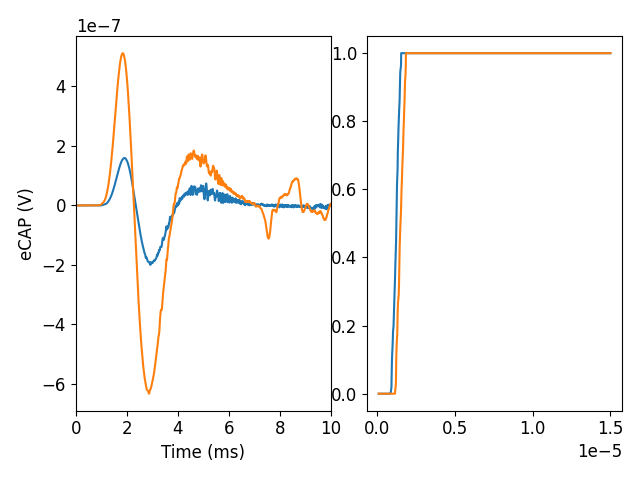

<IPython.core.display.Javascript object>


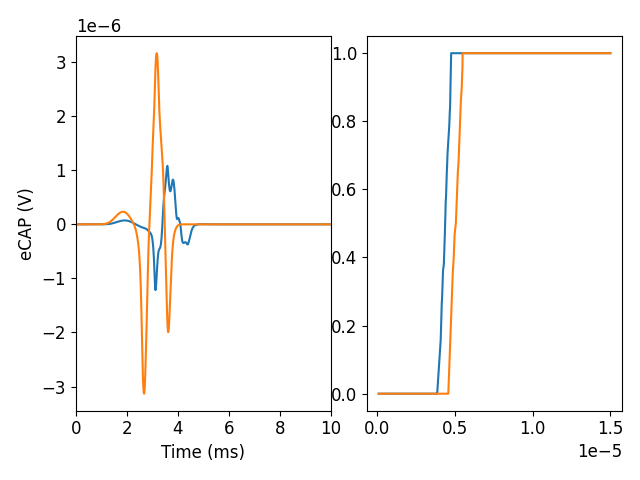

<IPython.core.display.Javascript object>


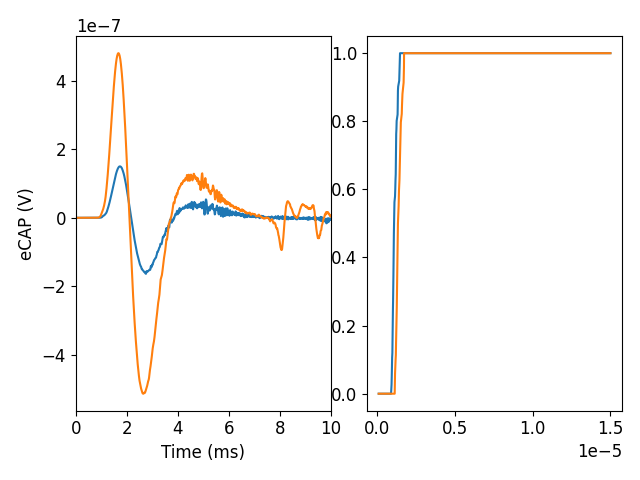

<IPython.core.display.Javascript object>


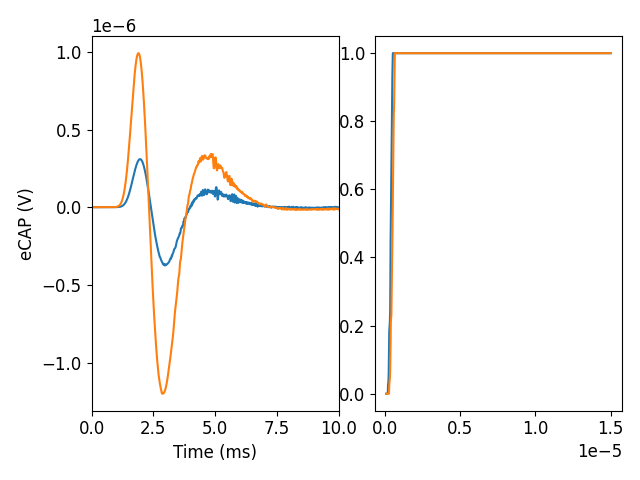

<IPython.core.display.Javascript object>


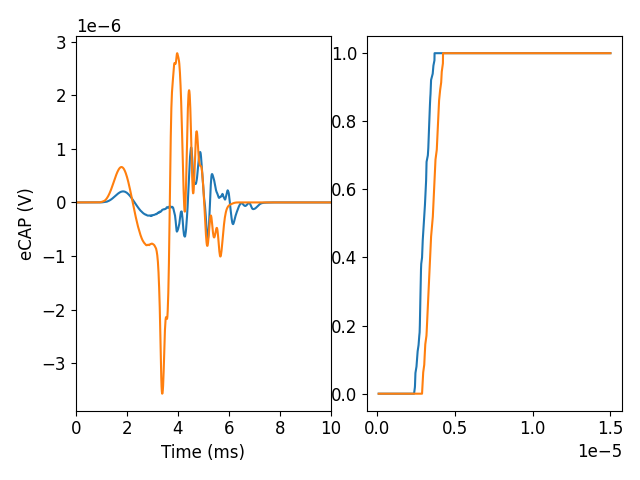

<IPython.core.display.Javascript object>


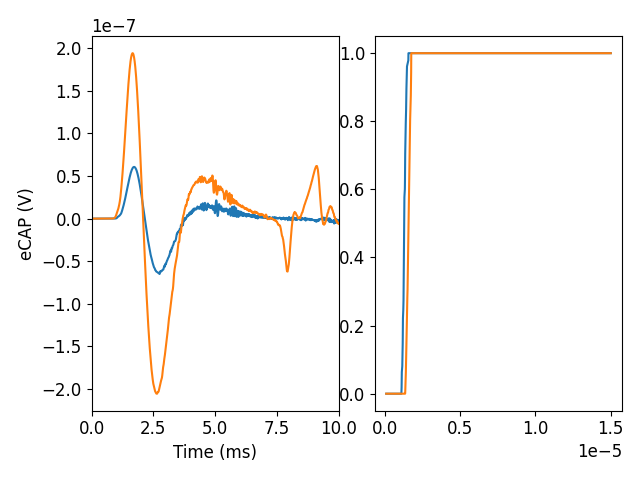

<IPython.core.display.Javascript object>


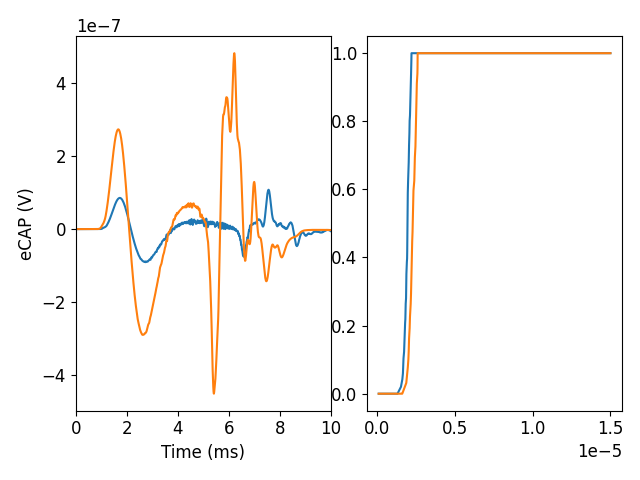

<IPython.core.display.Javascript object>


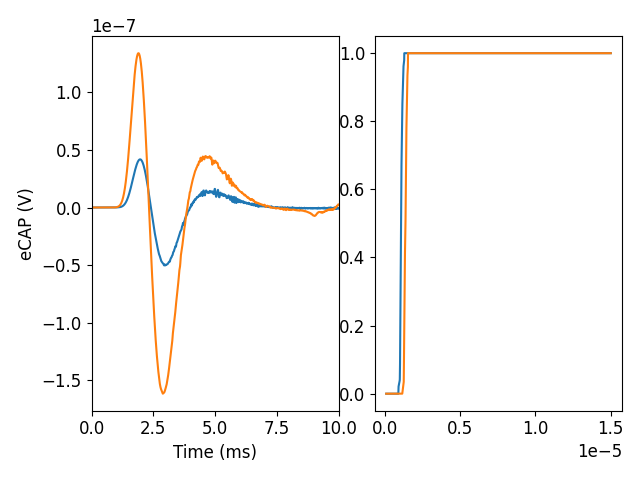

<IPython.core.display.Javascript object>


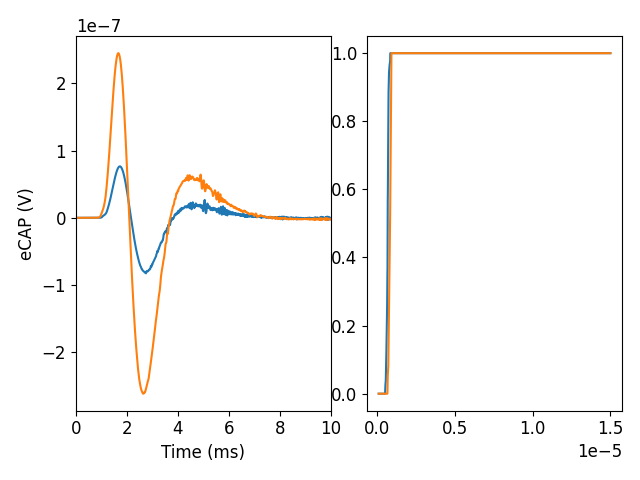

<IPython.core.display.Javascript object>


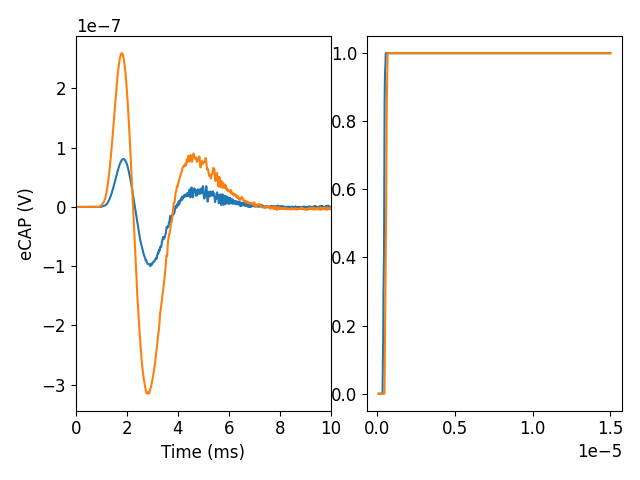

<IPython.core.display.Javascript object>


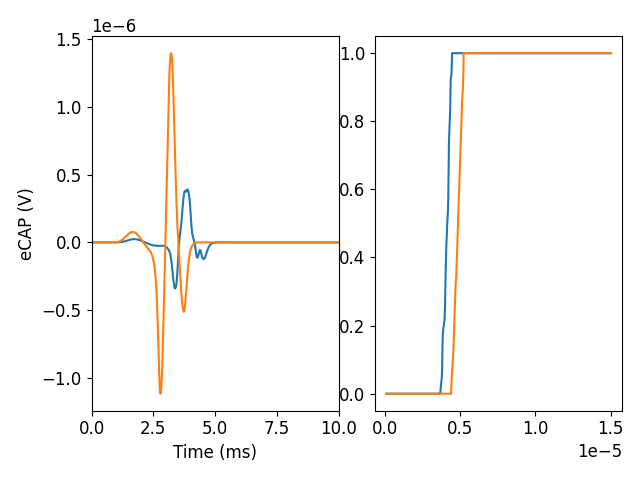

<IPython.core.display.Javascript object>


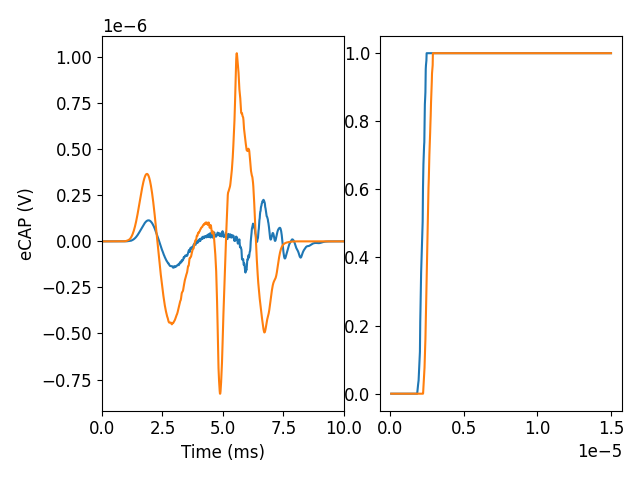

<IPython.core.display.Javascript object>


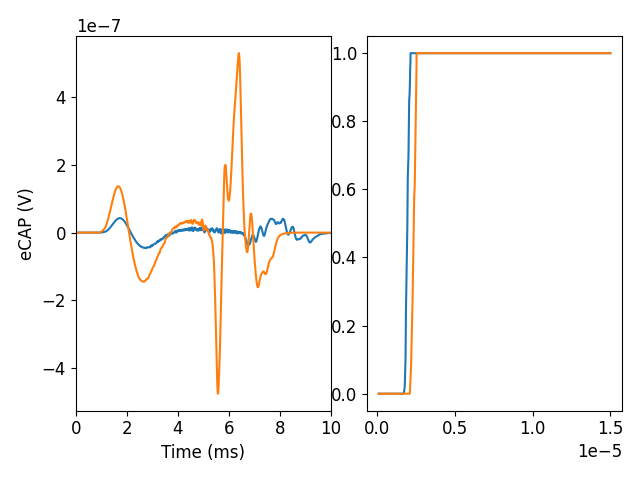

<IPython.core.display.Javascript object>


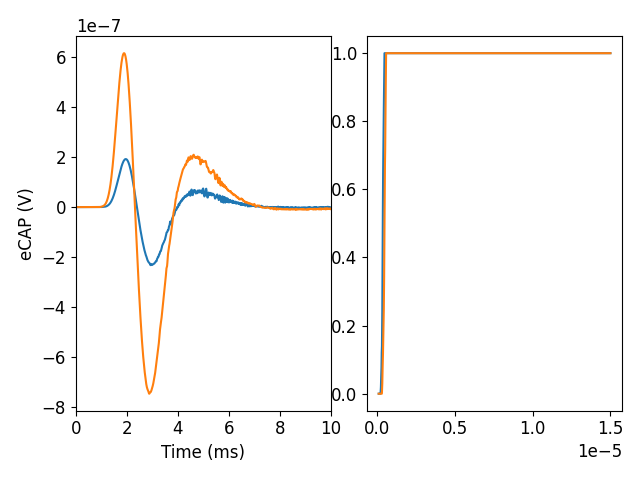

<IPython.core.display.Javascript object>


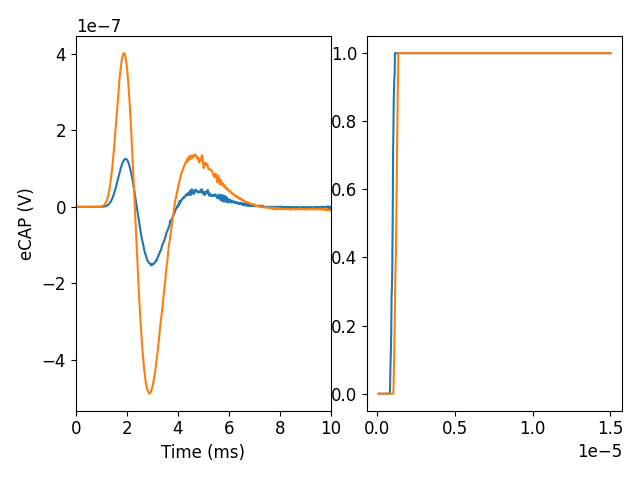

/gpfs/bbp.cscs.ch/home/tharayil/bluepy-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


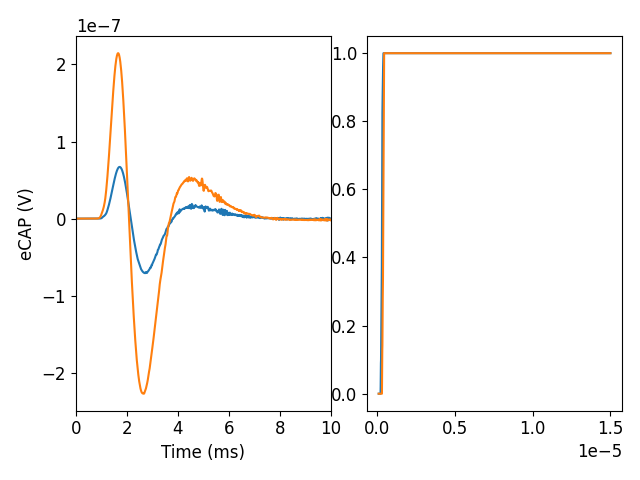

<IPython.core.display.Javascript object>


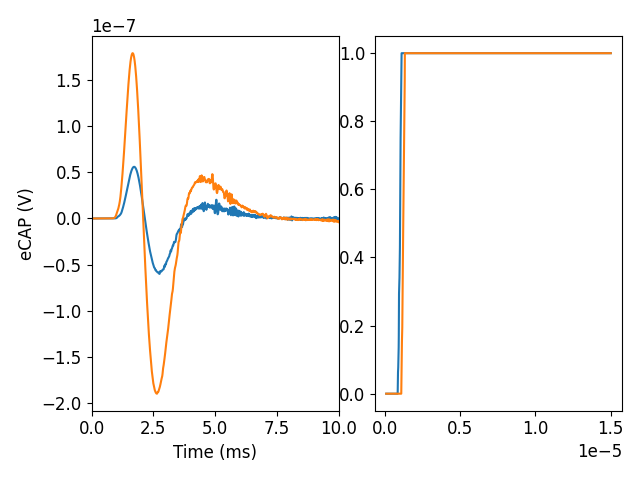

<IPython.core.display.Javascript object>


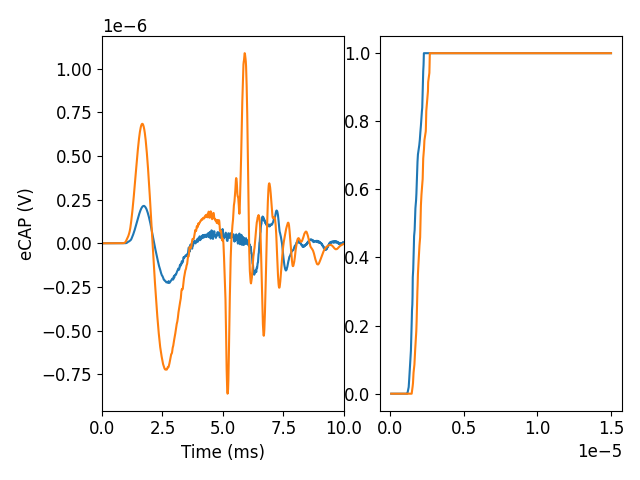

<IPython.core.display.Javascript object>


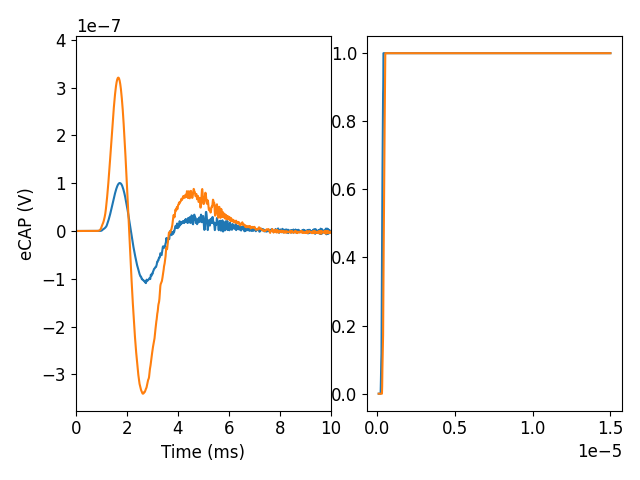

<IPython.core.display.Javascript object>


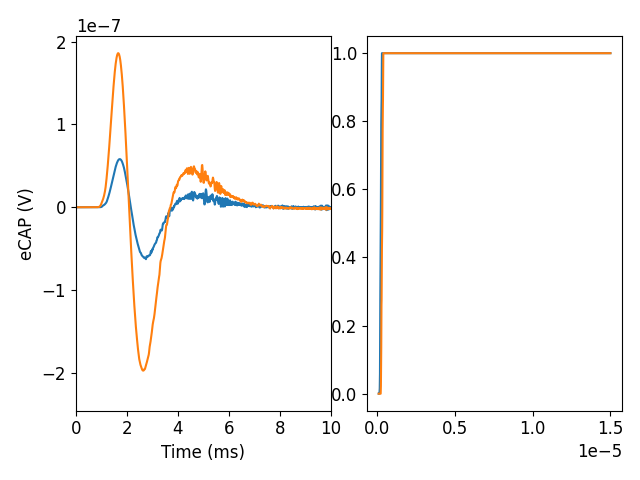

<IPython.core.display.Javascript object>


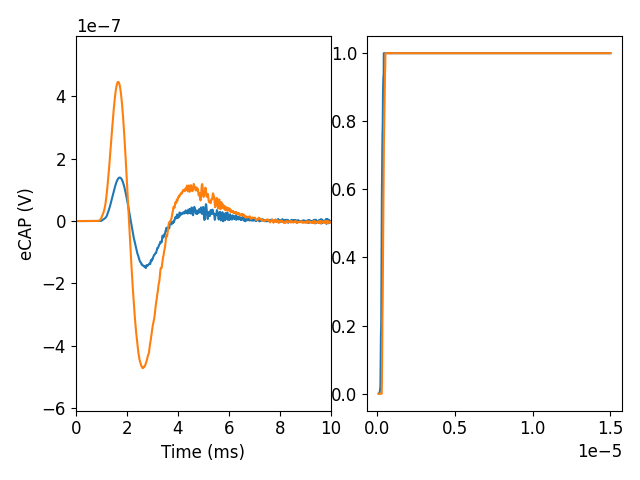

<IPython.core.display.Javascript object>


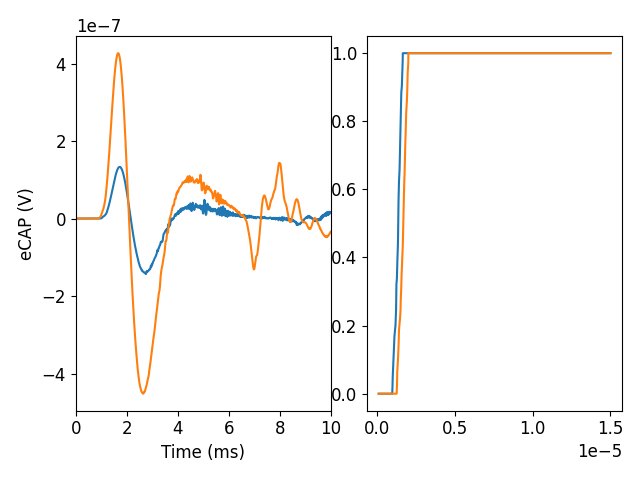

<IPython.core.display.Javascript object>


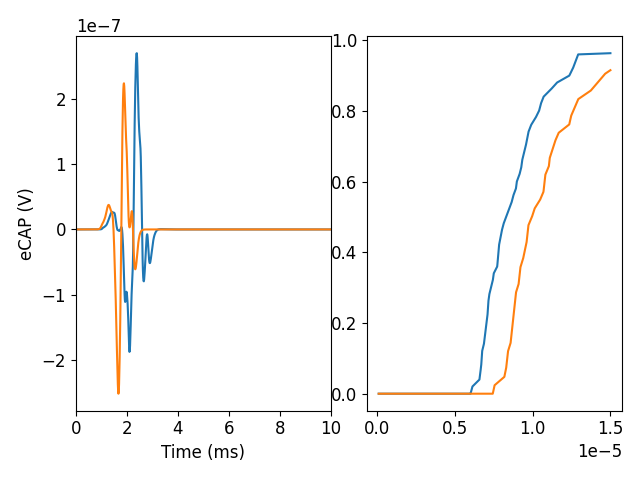

<IPython.core.display.Javascript object>


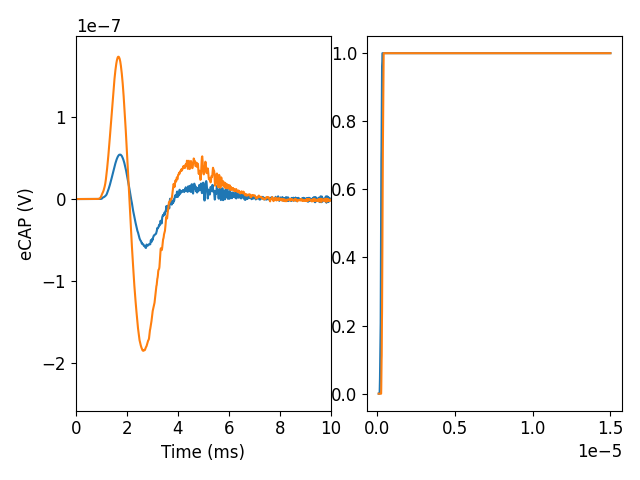

<IPython.core.display.Javascript object>


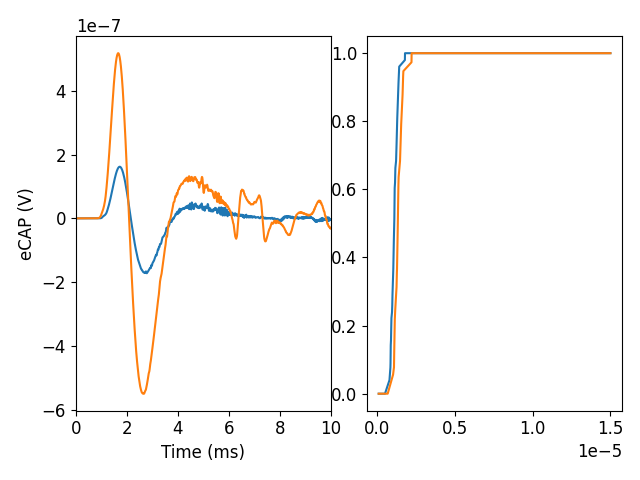

<IPython.core.display.Javascript object>


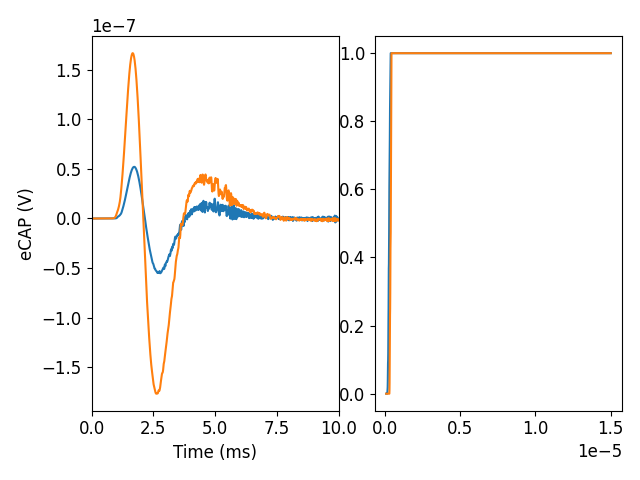

<IPython.core.display.Javascript object>


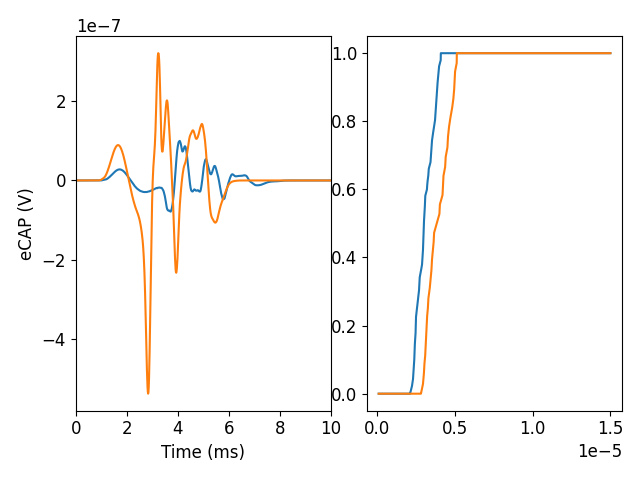

<IPython.core.display.Javascript object>


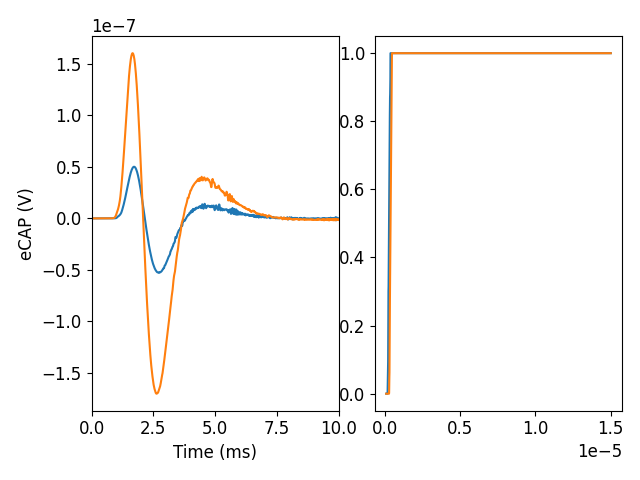

<IPython.core.display.Javascript object>


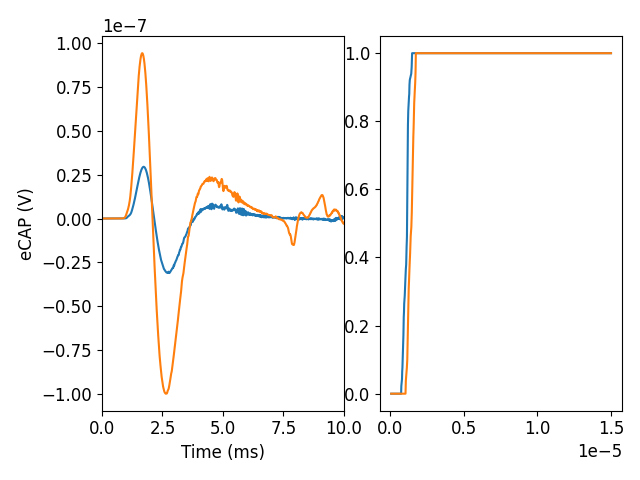

<IPython.core.display.Javascript object>


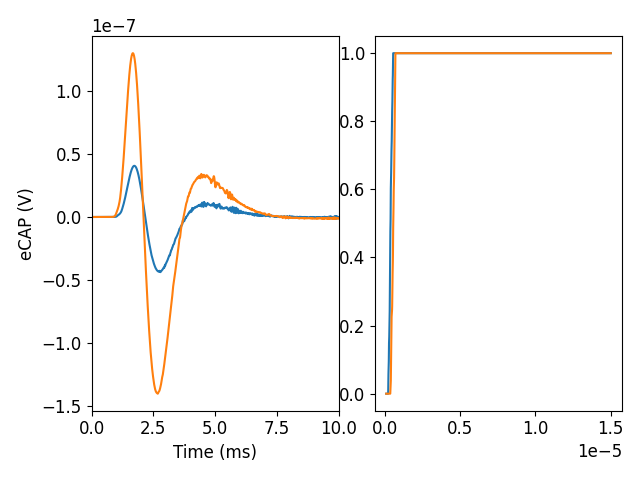

<IPython.core.display.Javascript object>


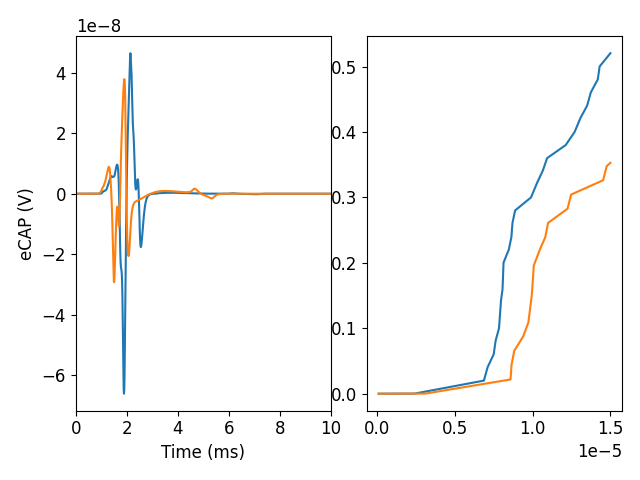

<IPython.core.display.Javascript object>


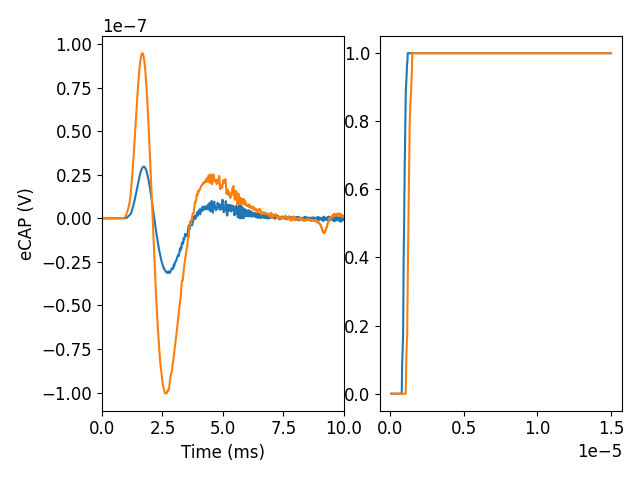

<IPython.core.display.Javascript object>


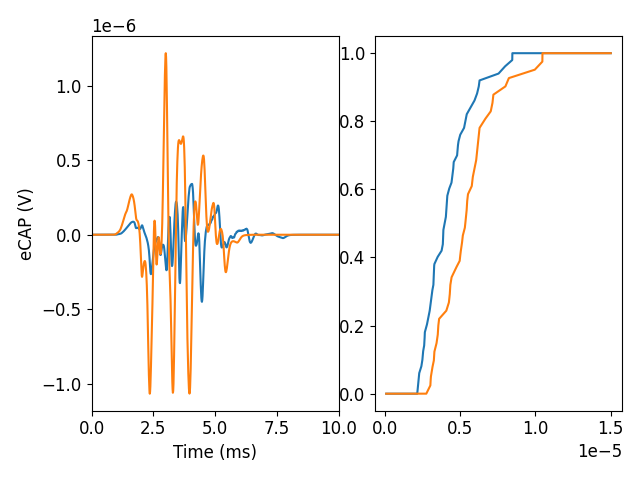

<IPython.core.display.Javascript object>


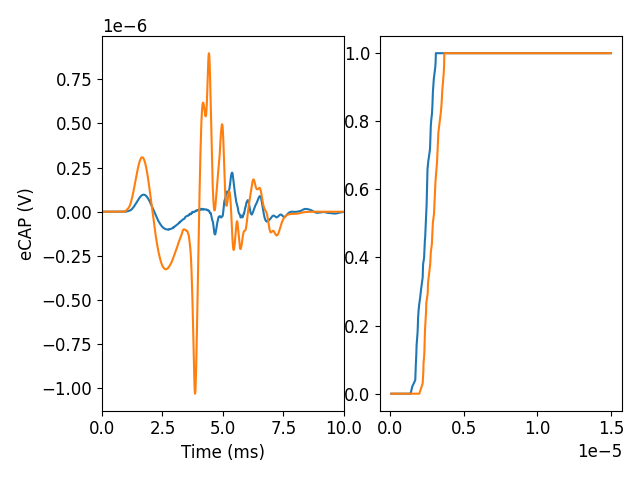

In [15]:
for i in range(39):
    plt.figure()
    plt.subplot(1,2,1)
    
    plt.plot(time[1:-1]*1e3,totalAll[i,-1])
    plt.plot(time[1:-1]*1e3,totalAllR[i,-1])

    plt.xlabel('Time (ms)')
    plt.ylabel('eCAP (V)')

    plt.xlim([0,10])
    
    plt.tight_layout()
    
    plt.subplot(1,2,2)
    plt.plot(d,recruitment[i][-1][0])
    plt.plot(d,recruitmentR[i][-1][0])

<IPython.core.display.Javascript object>


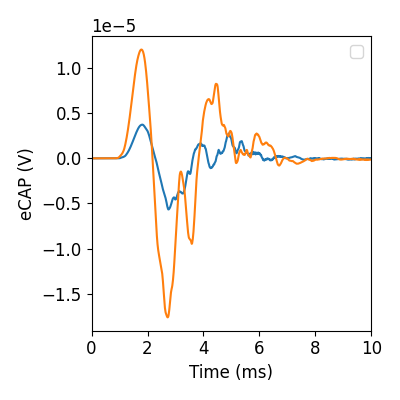

In [16]:
plt.figure(figsize=(4,4))

legend = []

    
plt.plot(time[1:-1]*1e3,signals[-1])
plt.plot(time[1:-1]*1e3,signalsR[-1])

plt.xlabel('Time (ms)')
plt.ylabel('eCAP (V)')
plt.legend(legend)

plt.xlim([0,10])
plt.tight_layout()